In [1]:
##Mounting GDRIVEE


In [2]:
##IMPORTING LIBRARIES

In [11]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
MAX_NB_WORDS = 100000    # max no. of words for tokenizer
MAX_SEQUENCE_LENGTH = 200 # max length of each entry (sentence), including padding
VALIDATION_SPLIT = 0.2   # data for validation (not used in training)
EMBEDDING_DIM = 100      # embedding dimensions for word vectors (word2vec/GloVe)


In [12]:
df = pd.read_csv('/content/drive/My Drive/data /mini_data.csv',encoding='latin', header= None)

In [13]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [14]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [16]:
###dropping all the useless :P columns

In [ ]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [18]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [19]:
df = df.replace(4,1)

In [20]:
df.head(-6)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599989,1,@Ms_Hip_Hop im glad ur doing well
1599990,1,WOOOOO! Xbox is back
1599991,1,@rmedina @LaTati Mmmm That sounds absolutely ...
1599992,1,ReCoVeRiNg FrOm ThE lOnG wEeKeNd


In [21]:
##balancing 

1    800000
0    800000
Name: sentiment, dtype: int64


<BarContainer object of 2 artists>

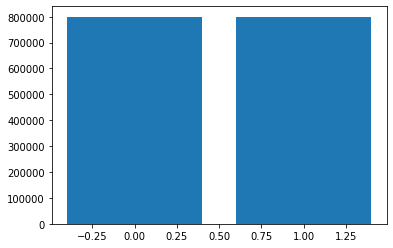

In [22]:
sen_value = df['sentiment'].value_counts()
print(sen_value)
plt.bar(sen_value.index, sen_value.values)

In [23]:
###Text preprocessing

In [24]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
        tokens.append(token)
  return " ".join(tokens)

df['text'] = df['text'].apply(lambda x: preprocess(x))

df['text'][400000]



'mutha effin bored'

In [25]:
df = shuffle(df)

In [26]:
df.head(-4
)

,sentiment,text
116288,0,sick one bad day another give
1225589,1,wrote yur dad amp mom amp taylor morning amp d...
10994,0,sitting work wishing could ran susan g instead
1384038,1,get eurostar english channel
114880,0,got early go hiking everyone punks
...,...,...
455376,0,bummed weekend winding close sucks go way quic...
438888,0,know kind absurdity reminds phrase guns outlaw...
167705,0,im fed
944263,1,star trek library paramount awesome


In [28]:
##Advanced Tokeninzing

In [29]:
embed_dim = 100
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size= 160000 
test_portion=.1

In [30]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])

word_index = tokenizer.word_index
vocab_size = len(word_index)

sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences,
                      maxlen=max_length,
                      padding=padding_type,
                      truncating=trunc_type)

split = int(test_portion * training_size)

test_seq = padded[:split]
train_seq = padded[split:training_size]
test_labels = df['sentiment'][:split]
train_labels = df['sentiment'][split:training_size]

print(vocab_size)
print(word_index['good'])



335507
1


In [31]:
###Embedding Matrix for GloVe

In [33]:
embed_index = {}

with open('/content/drive/My Drive/data /glove.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embed_index[word] = coefs;
        
embed_matrix = np.zeros((vocab_size+1, embed_dim));
for word, i in word_index.items():
    embed_vector = embed_index.get(word);
    if embed_vector is not None:
        embed_matrix[i] = embed_vector;
print("cool")

cool


In [ ]:
print(len(embed_matrix))

In [35]:
###Model 

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embed_dim, input_length=max_length, weights=[embed_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 100)           33550800  
_________________________________________________________________
dropout (Dropout)            (None, 16, 100)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 16, 128)           63744     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                31104     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [37]:
num_epochs = 50

train_padded = np.array(train_seq)
train_labels = np.array(train_labels)
test_padded = np.array(test_seq)
test_labels = np.array(test_labels)

history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels), verbose=1)

print("Training Complete")

Epoch 1/50
4500/4500 [==============================] - 42s 9ms/step - loss: 0.5606 - accuracy: 0.7081 - val_loss: 0.5154 - val_accuracy: 0.7415
Epoch 2/50
4500/4500 [==============================] - 41s 9ms/step - loss: 0.5222 - accuracy: 0.7381 - val_loss: 0.5029 - val_accuracy: 0.7511
Epoch 3/50
4500/4500 [==============================] - 40s 9ms/step - loss: 0.5057 - accuracy: 0.7500 - val_loss: 0.4950 - val_accuracy: 0.7549
Epoch 4/50
4500/4500 [==============================] - 40s 9ms/step - loss: 0.4946 - accuracy: 0.7583 - val_loss: 0.4870 - val_accuracy: 0.7624
Epoch 5/50
4500/4500 [==============================] - 40s 9ms/step - loss: 0.4844 - accuracy: 0.7644 - val_loss: 0.4869 - val_accuracy: 0.7623
Epoch 6/50
4500/4500 [==============================] - 41s 9ms/step - loss: 0.4761 - accuracy: 0.7697 - val_loss: 0.4868 - val_accuracy: 0.7654
Epoch 7/50
4500/4500 [==============================] - 41s 9ms/step - loss: 0.4688 - accuracy: 0.7750 - val_loss: 0.4912 - val_ac

<Figure size 432x288 with 0 Axes>

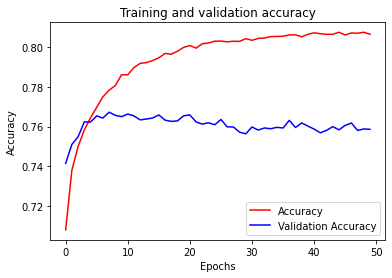

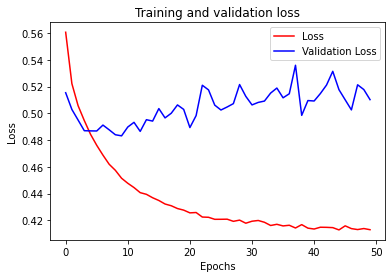

<Figure size 432x288 with 0 Axes>

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()


# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()